# Lab02: Working with Time Series


## 1. Thu thập dữ liệu

- Ngữ cảnh để nhóm chúng em tìm kiếm dữ liệu này:
- Chủ đề dữ liệu:
- Nguồn dữ liệu:
- License của dữ liệu:
- Phương pháp để thu thập dữ liệu này:


## 2. Tiền xử lý dữ liệu

#### Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import sklearn

import ipywidgets as widgets
from ipywidgets import*
from IPython.display import display

from plotly.subplots import make_subplots
from plotly.offline import iplot
from ipyvizzu import Chart, Data, Config, Style

import plotly.figure_factory as ff

#### Đọc dữ liệu từ file CSV

In [3]:
df = pd.read_csv("./../datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv",sep=";")

#### In 5 dòng dữ liệu đầu tiên

In [3]:
df.head()

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


#### Thông tin số dòng và số cột

In [4]:
df.shape

(5358, 8)

 -> Bộ dữ liệu có 5358 dòng và 8 cột

### 2.1. Mỗi dòng có ý nghĩa gì? ? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng dữ liệu cho biết thông tin xăng dầu theo ngày của mỗi loại xăng ở Ý, cụ thể: giá xăng, vat,...

Tất cả các dòng dữ liệu có ý nghĩa hoàn toàn giống nhau và không có ngoại lệ. 

### 2.2. Mỗi cột có ý nghĩa gì?


In [6]:
df.columns

Index(['SURVEY_DATE', 'PRODUCT_ID', 'PRODUCT_NAME', 'PRICE', 'VAT', 'EXCISE',
       'NET', 'CHANGE'],
      dtype='object')

- Cột `SURVEY_DATE` là ngày thực hiện khảo sát
- Cột `PRODUCT_ID` là mã số của từng loại xăng dầu 
- Cột `PRODUCT_NAME` là tên của loại xăng dầu
- Cột `PRICE` là giá xăng dầu
- Cột `VAT` là thuế giá trị gia tăng VAT
- Cột `EXCISE`là thuế tiêu thụ đặc biệt Excise
- Cột `NET` là giá trị thực tế của xáng dầu sau khi loại bỏ các khoản thuế.
- Cột `CHANGE` là khoảng thay đổi của giá xăng dầu

### 2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

In [7]:
df.dtypes

SURVEY_DATE      object
PRODUCT_ID        int64
PRODUCT_NAME     object
PRICE           float64
VAT             float64
EXCISE          float64
NET             float64
CHANGE          float64
dtype: object

- Dữ liệu ở các cột `SURVEY_DATE`, `PRODUCT_NAME` thuộc kiểu non-numeric
- Dữ liệu ở các cột `PRODUCT_ID` thuộc kiểu số nguyên
- Dữ liệu ở các cột `PRICE`, `VAT`, `EXCISE`, `NET`, `CHANGE` thuộc kiểu số thực

Cột `SURVEY_DATE` sẽ được xử lý tiếp để chuyển từ kiểu dữ liệu object sang datetime

### 2.4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

#### Phân bố của dữ liệu ở cột `PRICE`

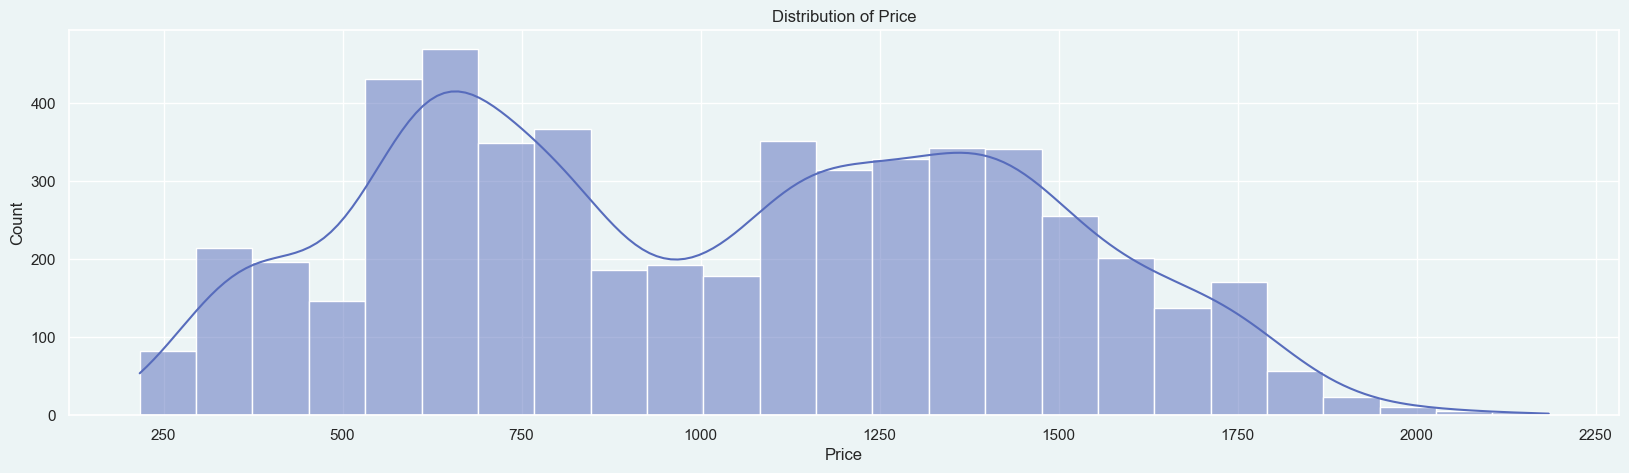

In [91]:
plt.figure(figsize=(20, 5))
sns.histplot(df['PRICE'],color="#576CBC",kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.show()

#### Phân bố của dữ liệu ở cột `VAT`

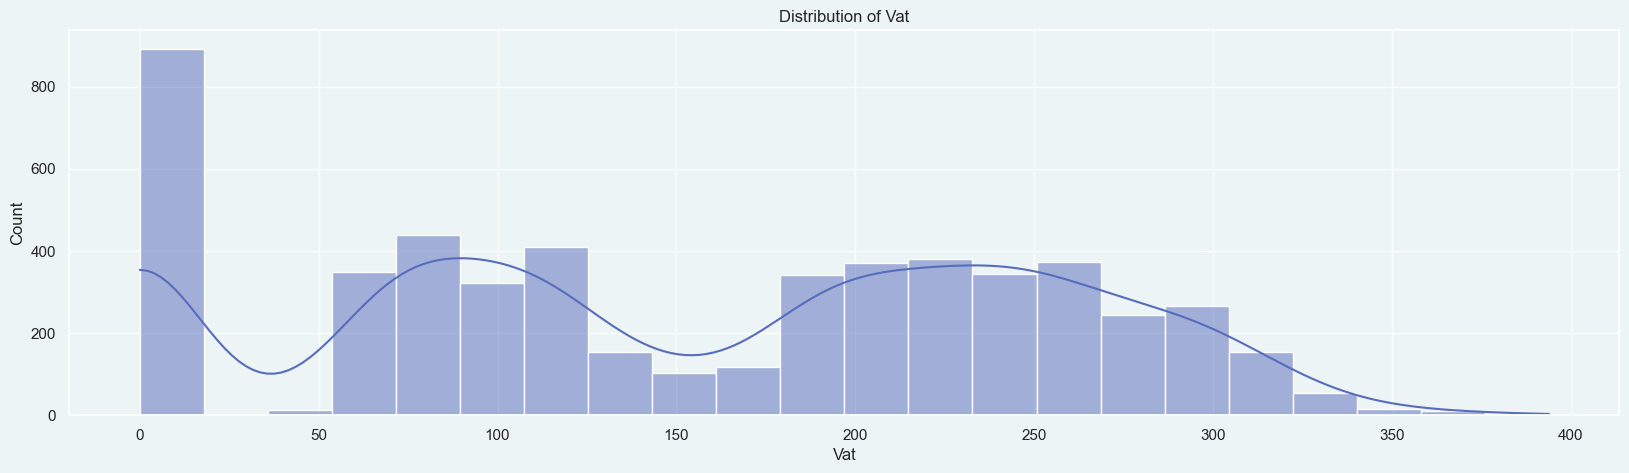

In [92]:
plt.figure(figsize=(20, 5))
sns.histplot(df['VAT'],kde=True,color="#576CBC")
plt.title('Distribution of Vat')
plt.xlabel('Vat')
plt.show()

#### Phân bố của dữ liệu ở cột `EXCISE`

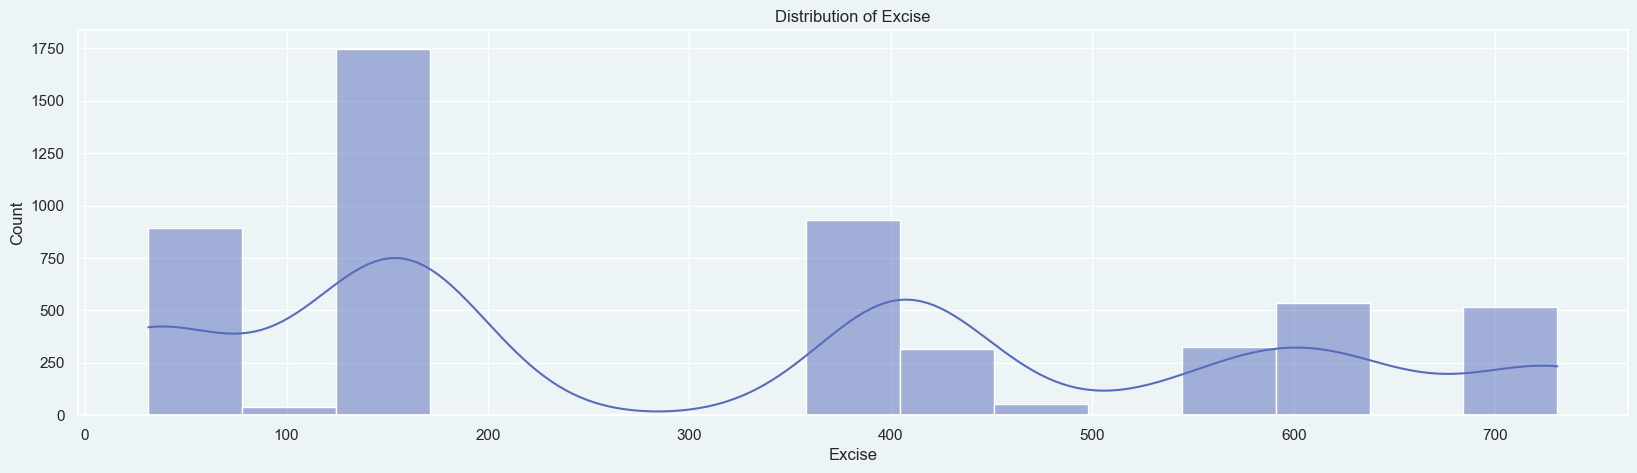

In [93]:
plt.figure(figsize=(20, 5))
sns.histplot(df['EXCISE'],kde=True,color="#576CBC")
plt.title('Distribution of Excise')
plt.xlabel('Excise')
plt.show()

#### Phân bố của dữ liệu ở cột `NET`

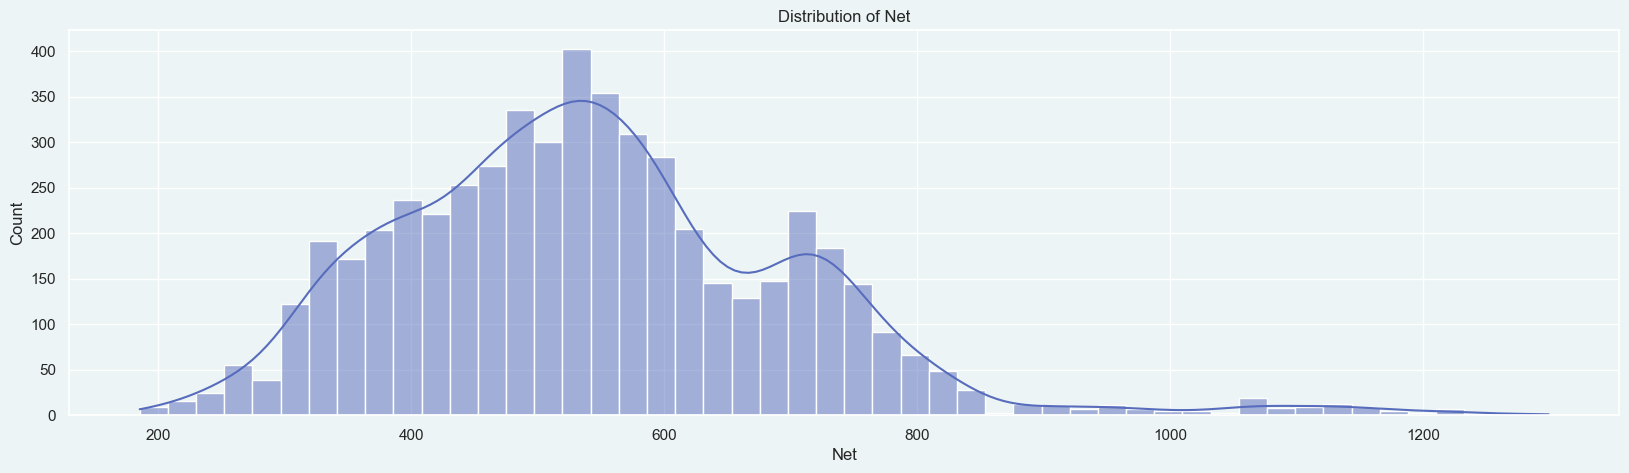

In [94]:
plt.figure(figsize=(20, 5))
sns.histplot(df['NET'],kde=True,color="#576CBC")
plt.title('Distribution of Net')
plt.xlabel('Net')
plt.show()

#### Phân bố của dữ liệu ở cột `CHANGE`

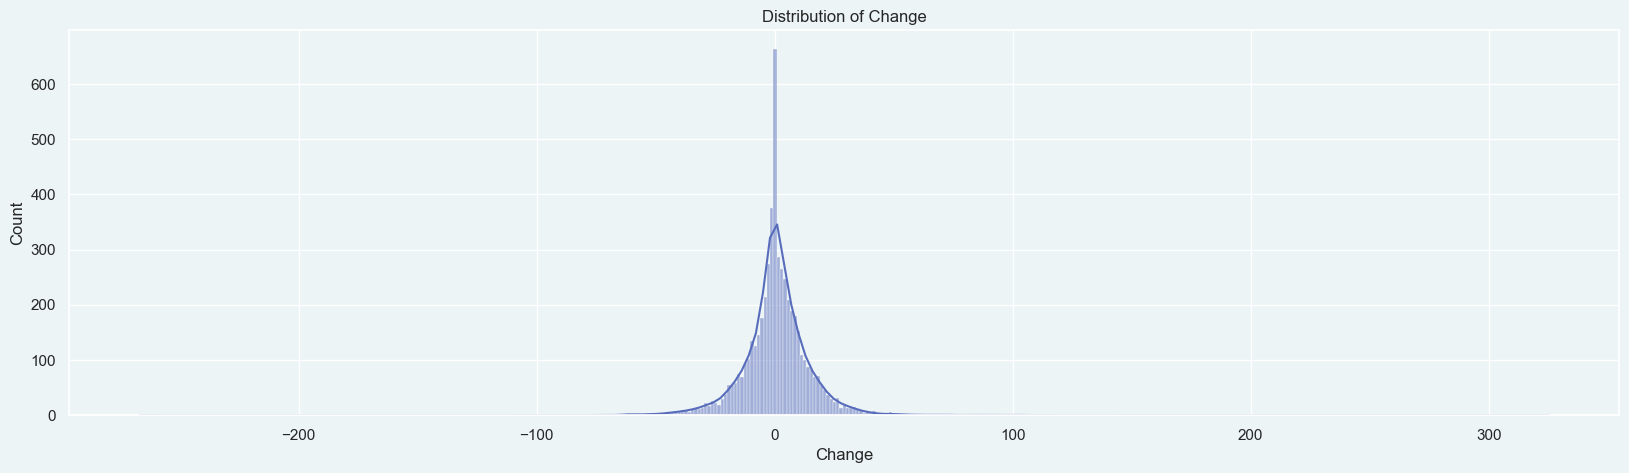

In [100]:
plt.figure(figsize=(20, 5))
sns.histplot(df['CHANGE'],kde=True,color="#576CBC")
plt.title('Distribution of Change')
plt.xlabel('Change')
plt.show()


#### Phân bố của dữ liệu ở cột `PRODUCE_NAME`

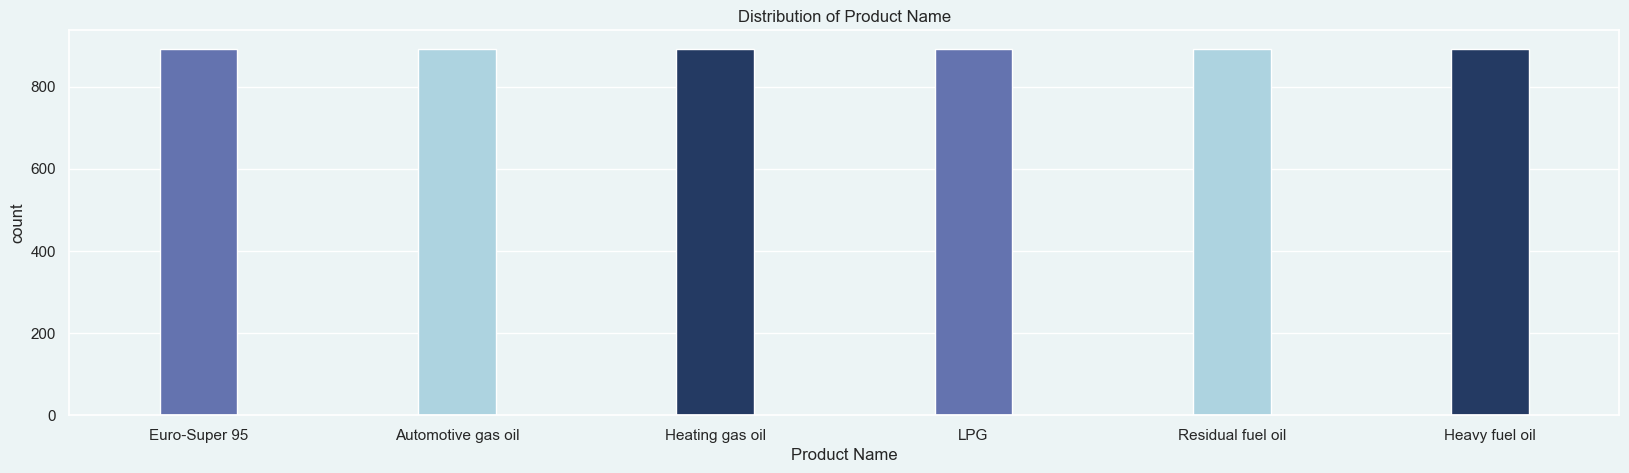

In [98]:
plt.figure(figsize=(20, 5))
sns.countplot(data=df,x='PRODUCT_NAME', width=0.3,palette=["#576CBC","#A5D7E8","#19376D"])
plt.title('Distribution of Product Name')
plt.xlabel('Product Name')
plt.show()

### 2.5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

**Kiểm tra các dòng trùng lặp**

In [25]:
df.duplicated().sum()

0

-> Không có dòng dữ liệu nào bị lặp lại

**Kiểm tra các cột bị mất dữ liệu**

In [19]:
# find missing values
df.isnull().sum()

SURVEY_DATE     0
PRODUCT_ID      0
PRODUCT_NAME    0
PRICE           0
VAT             0
EXCISE          0
NET             0
CHANGE          0
dtype: int64

Không có cột nào bị mất dữ liệu

**Chuyển cột `SURVEY_DATE` sang kiểu datetime**

In [20]:
# convert survey date column to datetime
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

**Kiểm tra lại dữ liệu**

In [21]:
df.dtypes

SURVEY_DATE     datetime64[ns]
PRODUCT_ID               int64
PRODUCT_NAME            object
PRICE                  float64
VAT                    float64
EXCISE                 float64
NET                    float64
CHANGE                 float64
dtype: object

#### Nhận xét:

Dữ liệu không xuất hiện việc mất giá trị, các cột ngoài cột `SURVEY_DATE` trong Dataframe không cần phải xử lý thêm.

## 3. Khám phá mối quan hệ trong dữ liệu

Chúng ta sẽ khám phá các mối quan hệ trong dữ liệu bằng cách đưa ra những câu hỏi và trả lời.

### 3.1. Đặt câu hỏi

**1. Câu hỏi 1:**
	
**Nội dung câu hỏi:** Giá xăng dầu có sự biến động như thế nào trong khoảng thời gian từ 2005-2022? Hãy thể hiện sự biến động này cả theo năm và theo từng tháng trong năm.

**2. Câu hỏi 2:**

**Nội dung câu hỏi** Thống kê giá trị NET của các loại xăng dầu trong 3 năm gần đây (2020-2022). Cho thấy sự chênh lệch của mỗi loại với giá trị trung bình.

**3. Câu hỏi 3:**

**Nội dung câu hỏi:** Hãy chứng minh cho nhận định rút ra ở câu 2 "giá xăng dầu (Price) còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax)".

**4. Câu hỏi 4:**

**Nội dung câu hỏi:** Hãy cho thấy sự biến động về giá bán trong thị trường xăng dầu ở Ý với nhiều góc nhìn thời gian khác nhau:
- Toàn bộ khoảng thời gian từ 2005-2022
- Trong vòng 30 ngày trước
- Trong vòng 6 tháng trước
- Trong vòng 1 năm trước

**5. Câu hỏi 5:** Sự thay đổi giá nhiên liệu theo thời gian?

**6. Câu hỏi 6:** Phân phối giá nhiên liệu theo loại sản phẩm?

**7. Câu hỏi 7:** Sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise.

**8. Câu hỏi 8:**


### 3.2. Trả lời câu hỏi

#### **Câu hỏi 1:**

**Loại biểu đồ sử dụng:** biểu đồ thanh dọc (kết hợp hiệu ứng động), biểu đồ đường.

**Tính phù hợp của biểu đồ với dữ liệu:** 
- Biểu đồ thanh dọc và biểu đồ đường là lựa chọn phù hợp để so sánh số liệu hoặc giá trị theo thời gian.

- Để nhìn thấy được sự biến động giá các loại xăng dầu theo thời gian:
    - Với biểu đồ thanh dọc: sử dụng hiệu ứng trực quan theo từng năm.
    - Với biểu đồ đường: lấy trục x của biểu đồ làm trục thời gian, giá xăng dầu là trục y sẽ biến thiên theo thời gian tương ứng.

**Trực quan hóa:**

***Giá xăng dầu theo năm:*** 

In [22]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df1=df.copy()
df1['GET_YEAR']=df1['SURVEY_DATE'].dt.year
df1= df1.groupby(['GET_YEAR','PRODUCT_NAME'])["PRICE"].mean().reset_index()

# Tiến hành trực quan hóa dữ liệu
running_chart = Chart(display = "begin")
running_chart.scroll_into_view = False
data=Data()
data.add_data_frame(df1)
chart = Chart(width="500px", height="300px")
running_chart.animate(data)

config = Config({"channels": {"x": { "set": ["PRODUCT_NAME"], "range": { "min": "-5.9max" } },"y": { "set": ["PRICE"], "range": { "max": 2100} },
                "color": { "set": ["PRODUCT_NAME"] },
            "label": { "set": ["PRICE"] }},
            "sort": 'byValue'})

style= Style({"plot": {"marker": {"label": {"maxFractionDigits": "0"}}, "paddingLeft":"10em", "xAxis": { "title": { "color" : "#475A80" }}}})

for year in range(2005, 2023):
    running_chart.animate(Config({"title": f"Average fuel price {year}"}))
    running_chart.animate(Data.filter(f"parseInt(record.GET_YEAR) == {year}"), 
                          config,style,
                          duration = 2,
                          delay = 0,        
                          x = { "easing": "linear", "delay": 0 },
                          y = { "delay": 0 },
                          show = { "delay": 3 },
                          hide = { "delay": 0 },
                          title = { "duration": 5, "delay": 0 })

***Giá xăng dầu theo từng tháng trong năm:***

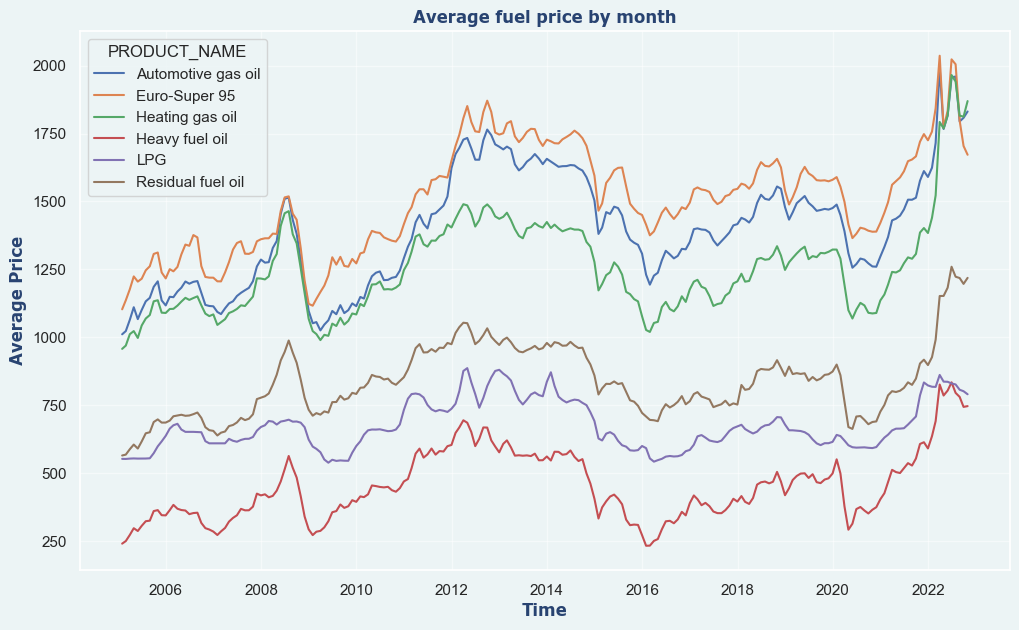

In [23]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df2=df.copy()
df2 = df2.set_index('SURVEY_DATE').groupby([pd.Grouper(freq='M'),'PRODUCT_NAME'])[['PRICE']].mean()

# Tiến hành trực quan hóa dữ liệu
sns.set(rc={"axes.facecolor":"#ECF4F5","figure.facecolor":"#ECF4F5"})
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=df2, x="SURVEY_DATE", y='PRICE', hue='PRODUCT_NAME', ax=ax)
ax.set_ylabel('Average Price', fontweight='bold', color="#284371", family ='Verdana')
ax.set_xlabel('Time', fontweight='bold', color="#284371", family ='Verdana')
ax.set_title('Average fuel price by month', fontweight='bold', loc='center', color="#284371", family ='Verdana')
ax.grid(alpha=0.5)
plt.show()

**Kỹ thuật trực quan sử dụng:**

- Màu sắc: mỗi màu sắc sẽ đại diện cho một loại xăng dầu khác nhau.

=> Điều này giúp người xem dễ dàng phân biệt, đưa ra so sánh giữa các loại xăng dầu một cách nhanh chóng.

**Nhận xét:**

<p><img style="float:right; margin:5px; padding:5px; max-height:200px" src="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/2048237.png"></p>
<p style="text-align:justify;">


Euro-Super 95 luôn là loại xăng có mức giá cao nhất,bởi lẽ nó là loại xăng chất lượng cao, được sản xuất thông qua quy trình công nghệ tiên tiến và cần thiết lọc hoàn chỉnh để đáp ứng các tiêu chuẩn khắt khe của Liên minh châu Âu (EU) về khí thải xe hơi. Được phân phối rộng rãi trên thị trường EU.

Heavy fuel oil luôn có giá rẻ hơn những loại xăng dầu khác, bởi lẽ nó có thành phần hydrocarbon nặng hơn và ít được xử lý hơn để sản xuất, nên nó thường được sử dụng cho các mục đích công nghiệp hoặc tàu biển, thay vì sử dụng trong phương tiện giao thông cá nhân. Ngoài ra, chi phí sản xuất, vận chuyển và lưu trữ heavy fuel oil cũng thấp hơn so với các loại xăng dầu khác.
   
Giá xăng dầu tại Ý có nhiều biến động theo thời gian từ 2005-2022, trong đó có một số cột mốc có sự biến động lớn như:

- Trong giai đoạn 2012-2014, giá xăng dầu tăng mạnh, nguyên nhân là do:
    - Tình trạng thiếu hụt và cạnh tranh về nguồn cung từ các nhà sản xuất dầu mỏ hàng đầu thế giới.
    - Sự biến động của tỷ giá tiền tệ, đặc biệt là khoảng thời gian khi euro giảm giá đối với USD.
    - Tăng thuế và phí liên quan đến điều chỉnh giá xăng dầu của chính phủ Ý.
    - Không ổn định trong sản xuất năng lượng tái tạo như điện mặt trời và gió, khiến cho người tiêu dùng phải phụ thuộc vào nguồn năng lượng từ dầu mỏ và khí đốt.
- Trong năm 2020, giá xăng dầu giảm mạnh, nguyên nhân là do:
    - Sự tràn đầy của nguồn cung dầu mỏ toàn cầu trong hoàn cảnh giảm nhu cầu do ảnh hưởng của đại dịch COVID-19, khiến cho giá xăng dầu trên thế giới giảm sút.
    - Sự gia tăng sản xuất dầu mỏ từ các quốc gia OPEC+, đặc biệt là một số thành viên mới như Nga và Kazakhstan, đã đẩy giá xăng dầu trở lại mức thấp.
</p>


#### **Câu hỏi 2:**

**Loại biểu đồ sử dụng:** biểu đồ thanh ngang.

In [24]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df3=df.copy()
df3['GET_YEAR']=df3['SURVEY_DATE'].dt.year
df3 = df3.loc[(df3['GET_YEAR'] >= 2020)]
temp = df3.groupby(['PRODUCT_NAME'])['NET'].agg('mean').astype(int).sort_values()
year_values = df3.groupby(['PRODUCT_NAME','GET_YEAR'])['NET'].agg('mean').unstack().astype(int).reset_index()

# Tiến hành trực quan hóa dữ liệu
layout = go.Layout(
                    paper_bgcolor= '#f5f5f6',
                    plot_bgcolor='rgba(0,0,0,0)',
                    margin = dict( t = 100, b = 50, r = 70, l = 75),
                    width = 1000, height = 600,
                    font = dict(
                                family = "Franklin Gothic",
                                size = 10,
                                color= '#101010',
                    ),
                    titlefont = dict(
                                family =  "Franklin Gothic",
                                size = 22,
                                color = '#101010'
                    ),
                    title = '<b>NET value of fuel in the last 3 years (2020-2022)</b>',
                    xaxis = dict(
                              title = 'USD ($)',
                              showgrid = False,
                              zeroline = True,
                              showline = False,
                              showticklabels = False,
                             tickfont = dict(
                                  family = "Franklin Gothic",
                                  size = 12,
                                  color = '#101010'
                              ),
                    ),
                   yaxis = dict(
                              showgrid = False,
                              zeroline = True,
                              showline = False,
                              showticklabels = True,
                              zerolinecolor = 'darkgrey',
                              zerolinewidth = 1,
                              tickfont = dict(
                                  family = "Franklin Gothic",
                                  size = 12,
                                  color = '#101010'
                              ),
                   ),
                   showlegend = False
                )

fig = go.Figure(layout = layout)

for idx, (x_val,y_val)  in enumerate(zip(temp.values,temp.index)):
    hoverval = year_values.loc[year_values['PRODUCT_NAME'] == y_val]
    #print(hoverval)
    fig.add_trace(go.Bar(x=[x_val],
                         y=[y_val],
                         marker = dict(
                             color = '#19376D' if y_val in ['Heating gas oil','LPG'] else '#CCD5E7'
                         ),
                         width= 0.7,
                         hovertemplate= f''' <b>2020:</b> {round(hoverval.iloc[0,1])} $ | <b>2021:</b> {round(hoverval.iloc[0,2])} $ | <b>2022:</b> {round(hoverval.iloc[0,3])} $ <extra></extra>  ''',
                         orientation = 'h',
                         text = [x_val],
                         textposition="auto",
                         texttemplate='<b>%{text} $</b>',
                         textangle = 0
                        ))

fig.add_annotation(xref = 'paper',
                   yref = 'paper',
                   x = 0, y = 1.05, text = '"NET" stands for "No Extra Charge" - meaning there are no additional fees or charges.',
                   showarrow = False,
                   font = dict(
                                family = "Courier New",
                                size = 13,
                                color= '#101010',
                    ))
fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/224582%20(1).png",
        xref="paper",
        yref="paper",
        x=1.0, y=0.05,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)

fig.add_vline(x = round(temp.mean()),line_width=0.75, line_dash="dash", line_color= 'black',annotation= dict(text = f'Average NET Fuel: {round(temp.mean())} $'), annotation_position = 'bottom right')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

**Kỹ thuật trực quan sử dụng:**

- Màu sắc: biểu thị màu sắc thanh ngang có giá trị NET thấp nhất và cao nhất bằng màu xanh đậm.

=> kỹ thuật này giúp cho người xem có thể nhận thấy ngay 2 loại xăng dầu có giá trị NET thấp nhất và cao nhất ngay lập tức.

- Manipulate View: tương tác trực tiếp với đồ thị bằng cách trỏ chuột vào các thanh ngang, nó sẽ hiện lên giá trị NET 3 năm 2020-2022 của loại xăng dầu tương ứng.

=> Những kỹ thuật này giúp đồ thị giữ được sự rõ ràng và tinh gọn, cho phép người thấy được thông tin chi tiết khi có nhu cầu muốn xem.


**Nhận xét:**

Kết hợp với biểu đồ 1 ta có nhận xét:

- Heavy fuel oil là loại xăng dầu có NET thấp nhất đồng thời cũng có Price thấp nhất. 
- Tuy Euro-Super 95 là loại xăng có giá (Price) cao nhất, tuy nhiên LPG mới là loại xăng dầu có NET cao nhất. 

Nguyên nhân là do giá xăng dầu (Price) còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax). Và giá xăng dầu bán cho người tiêu dùng sẽ thường bao gồm cả giá trị NET và các khoản phí và thuế đã tính vào. 

#### **Câu hỏi 3:**

**Loại biểu đồ sử dụng:** biểu đồ nhiệt (heat map).

**Tính phù hợp của biểu đồ với dữ liệu:** dùng biểu đồ nhiệt là phù hợp khi muốn trực quan hóa và phân tích mối quan hệ giữa các biến liên tục trong một bảng dữ liệu. Biểu đồ nhiệt cho phép người xem dễ dàng nhận ra xu hướng, tìm ra các thuộc tính có mối quan hệ tương quan với nhau thông qua việc sử dụng màu sắc.

**Trực quan hóa:**

In [ ]:
corr = df[['PRICE', 'VAT', 'EXCISE','NET', 'CHANGE']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=800, height=550,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor='#C3CBDA',
                  )

fig.show()

<p><img style="float:right; margin:5px; padding:5px; max-height:200px" src="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/4072626.png"></p>
<p style="text-align:justify;">

**Nhận xét:** từ mức độ màu sắc và hệ số tương quan (correlation coefficient) được thể hiện giữa các thuộc tính trên biểu đồ ta có nhận xét:

- Các cặp thuộc tính (PRICE, NET), (PRICE, VAT), (PRICE, EXCISE) có hệ số tương quan lớn (gần bằng 1), và đều dương. Do đó có mối quan hệ tuyến tính giữa hai thuộc tính, trong đó khi một biến tăng thì biến còn lại cũng tăng theo cùng chiều.

=> Điều này minh chứng cho nhận định ở câu 2: giá xăng dầu (PRICE) không chỉ phụ thuộc vào giá trị NET mà còn phải phụ thuộc vào rất nhiều yếu tố khác như: thuế giá trị gia tăng (VAT) và thuế tiêu thụ đặc biệt (excise tax). Và khi các giá trị NET, VAT và EXCISE tăng thì sẽ kéo theo giá xăng dầu (PRICE) tăng.

- Giữa thuộc tính CHANGE (chỉ sự thay đổi giá của xăng dầu so với giá trị trước đó trong một khoảng thời gian nhất định) và các thuộc tính như PRICE, VAT, EXCISE, NET dường như không có mối quan hệ với nhau (hệ số tương quan xấp xỉ = 0). Bởi lẻ tỉ lệ thay đổi giá của xăng dầu trong một thời gian ngắn (tính theo tuần) sẽ phụ thuộc phần lớn vào thị trường tiêu thụ, tình hình cung cầu,...

</p>


#### **Câu hỏi 4:**

**Loại biểu đồ sử dụng:** biểu đồ miền (kết hợp tính năng bộ lọc).

**Tính phù hợp của biểu đồ với dữ liệu:** 
- Biểu đồ miền phù hợp (Area Chart) phù hợp để trực quan hóa, theo dõi sự thay đổi của các số liệu theo thời gian. Đây là một cách tốt để thể hiện xu hướng và biến động của dữ liệu.
- Tuy nhiên, các dữ liệu có quá nhiều số liệu, không có sự chênh lệch rõ rệt theo thời gian hoặc không có sự khác biệt về trị số sẽ không phù hợp để sử dụng biểu đồ miền phù hợp.

=> Biểu đồ miền là phù hợp để trực quan cho thị trường xăng dầu luôn biến động về giá cả, đặc biệt trong một khoảng thời gian dài (2005-2022).

**Trực quan hóa:**

In [ ]:
# Xử lý dữ liệu, tạo dữ liệu cần thiết
df4=df.copy()
df4 = df4[['SURVEY_DATE', 'PRICE']].groupby('SURVEY_DATE', as_index = False).mean()
df4 = df4.sort_values(by = 'SURVEY_DATE')

# Tiến hành trực quan hóa dữ liệu
colors = ['#5F78A8']

fig = px.area(x = df4['SURVEY_DATE'],
              y = df4['PRICE'],
              template = 'simple_white',
              color_discrete_sequence = colors,
             )

# layout
fig.update_layout(
    yaxis_title = "<b>Average Price</b>",
    xaxis_title="<b>Time</b>",
    font = dict(
            size = 13,
            family="Courier New"
            ),    
    title={
        'text': "<b>Average price value of all types of fuel (2005-2022) in Italy</b><br>(Range Slider and Selectors)",
        'y':0.95,
        'x':0.9
        },
    titlefont = dict(size = 22, family="Courier New"),
                  height = 500,
                  width = 1000,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  margin=dict(t=130 ,)
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all", label="2005-2022"),
            dict(count=1, label="last year", step="year", stepmode="backward"),
            dict(count=6, label="last 6 month", step="month", stepmode="backward"),
            dict(count=1, label="last 30 days", step="month", stepmode="backward")
        ])
    )
)

fig.add_layout_image(
    dict(
        source="https://raw.githubusercontent.com/nonameHiHiHi/SavePicture/main/Flag_of_Italy.png",
        xref="paper",
        yref="paper",
        x=1, y=1,
        sizex=0.25, sizey=0.25,
        xanchor="right", yanchor="bottom", sizing= "contain",
    )
)


fig.show()

**Kỹ thuật trực quan sử dụng:**

- Manipulate View: sử dụng tính năng bộ lọc để cho kép người dùng thực hiện các thao tác trực tiếp trên biểu đồ để thay đổi thông tin hiển thị. Ở đây bộ lọc có chức năng thể hiện giá cả trung bình của xăng dầu theo:
    - Toàn bộ khoảng thời gian từ 2005-2022
    - Trong vòng 30 ngày trước
    - Trong vòng 6 tháng trước
    - Trong vòng 1 năm trước
    
- Manipulate View: tương tác trực tiếp với đồ thị bằng cách trỏ chuột vào điểm dữ liệu trên đường, nó sẽ hiện lên giá cả trung bình của các loại xăng dầu tương ứng với mốc thời gian trỏ chuột. 

=> Những kỹ thuật này giúp đồ thị giữ được sự rõ ràng và tinh gọn, cho phép người thấy được thông tin chi tiết khi có nhu cầu muốn xem.

**Nhận xét:**

- Từ năm 2005-2022: giá cả trung bình trong thị trường xăng dầu tại Ý biến thiên liên tục.

- Khi thu hẹp phạm vi quan sát lại thành 6 tháng hay 30 ngày thì mức độ giao động giá cả thấp (chênh lệch nhau ít). Cho thấy giá cả xăng dầu ở thời điểm quan sát gần đây (trong năm 2022) ở Ý khá bình ổn. 

=> Thị trường xăng dầu biến động mạnh khi chịu ảnh hưởng của nhiều yếu tố khác trong một khoảng thời gian dài.

#### Câu hỏi 5: Sự thay đổi giá nhiên liệu theo thời gian?

***Loại biểu đồ sử dụng:*** Line chart


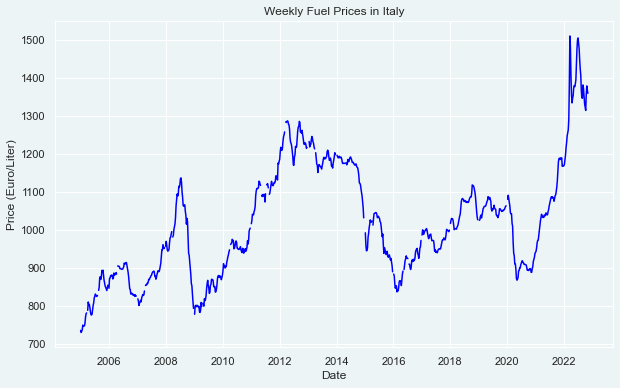

In [ ]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])

# Group data by date and find the average price for each week
weekly_prices = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(weekly_prices.index, weekly_prices['PRICE'], color='blue')
ax.set_title('Weekly Fuel Prices in Italy')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

****Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ đường (line chart) để minh họa sự thay đổi giá nhiên liệu theo thời gian. Chúng ta sẽ xếp thời gian trên trục x và giá nhiên liệu trên trục y. Với biểu đồ này, ta có thể quan sát được xu hướng tăng hoặc giảm của giá nhiên liệu qua các thời điểm khác nhau. Đây là một biểu đồ rất hữu ích để đánh giá sự thay đổi của giá nhiên liệu theo thời gian.****

### Câu hỏi 6:  Phân phối giá nhiên liệu theo loại sản phẩm?


***Loại biểu đồ sử dụng:***  Biểu đồ violin là một dạng biểu đồ tương tự như box plot, cho phép chúng ta trực quan hóa phân phối dữ liệu và cũng cung cấp thông tin về mật độ xác suất của các giá trị dữ liệu.


****Để trả lời câu hỏi này, chúng ta có thể sử dụng biểu đồ violin (violin plot) để so sánh phân phối giá nhiên liệu giữa các loại sản phẩm khác nhau. Biểu đồ violin sẽ cho chúng ta thấy phân phối của dữ liệu ở mỗi loại sản phẩm dưới dạng một cái đàn violin.****

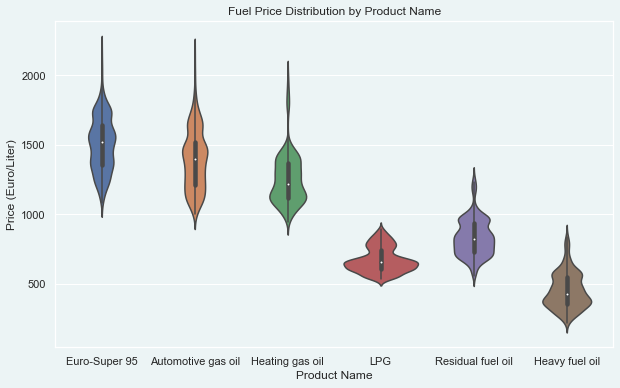

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='PRODUCT_NAME', y='PRICE', data=df, ax=ax)
ax.set_title('Fuel Price Distribution by Product Name')
ax.set_xlabel('Product Name')
ax.set_ylabel('Price (Euro/Liter)')
plt.show()

***Nhận xét:***  
 - Lý do chúng ta sử dụng biểu đồ violin trong trường hợp này là để hiển thị sự phân bố của giá nhiên liệu cho từng loại sản phẩm và so sánh sự khác biệt giữa các sản phẩm. Biểu đồ violin cho phép chúng ta hiển thị phân phối dữ liệu bằng cách vẽ các hình dạng violin đối xứng cho mỗi loại sản phẩm. Hình dạng của các violin được xây dựng dựa trên kernel density estimation (KDE) - một phương pháp ước tính hàm mật độ xác suất (PDF) dựa trên dữ liệu mẫu.

#### Câu hỏi 7: Sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise.


***Biểu đồ được chọn và lý do:*** 
 - Để trực quan hóa mối quan hệ giữa giá nhiên liệu và tỷ lệ VAT/Excise, chúng ta có thể sử dụng biểu đồ scatter plot với các điểm được mã màu theo một biến thứ ba - ở đây là loại sản phẩm. Biểu đồ này được gọi là bubble chart, cho phép chúng ta biểu diễn ba biến trên cùng một biểu đồ và thể hiện sự khác biệt giữa các loại sản phẩm.

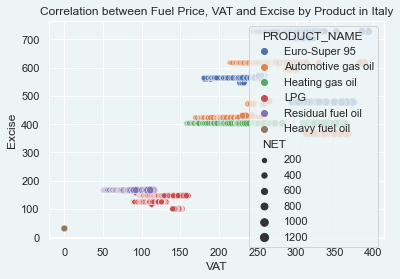

In [ ]:
sns.scatterplot(x="VAT", y="EXCISE", size="NET", hue="PRODUCT_NAME", data=df)

# set axis labels and title
plt.xlabel("VAT")
plt.ylabel("Excise")
plt.title("Correlation between Fuel Price, VAT and Excise by Product in Italy")

# show plot
plt.show()

***Nhận xét:***
 - Lý do chúng ta sử dụng biểu đồ bubble chart trong trường hợp này là để hiển thị sự tương quan giữa giá nhiên liệu và tỷ lệ VAT/Excise cho từng loại sản phẩm và so sánh sự khác biệt giữa các sản phẩm. Biểu đồ bubble chart cho phép chúng ta biểu diễn hai biến số lên trục hoành và tung, còn biến thứ ba được mã màu và kích thước của hình tròn. Sự khác biệt giữa các loại sản phẩm sẽ được thể hiện bằng kích thước của hình tròn và màu sắc khác nhau.

#### Câu hỏi 8: Hãy áp dụng mô hình hồi quy tuyến tính cho giá xăng dầu trung bình ở Ý.

**Loại biểu đồ sử dụng:** Biểu đồ dot plot

**Tính phù hợp của biểu đồ với dữ liệu:** 

- Biểu đồ Dot Plot rất phù hợp để trực quan hóa các mô hình thuật toán máy học. Điều này bởi vì dot plot cho phép trực quan hóa các quan hệ tuyến tính giữa các biến, cho phép chúng ta dễ dàng nhận ra sự phụ thuộc tuyến tính giữa biến đầu vào và biến đầu ra. Khi biểu đồ được vẽ, ta có thể dễ dàng nhận thấy các giá trị outlier, các điểm dữ liệu bất thường, giúp ta xác định được những điểm cần xử lý hoặc loại bỏ khỏi dữ liệu để cải thiện kết quả mô hình.

- Ngoài ra, dot plot cũng giúp ta kiểm tra tính tuyến tính của quan hệ giữa biến đầu vào và biến đầu ra, tức là xác định xem liệu mối quan hệ có phải là một hàm tuyến tính hay không. Khi mô hình hồi quy tuyến tính được áp dụng, ta sẽ sử dụng đường thẳng hồi quy để mô tả mối quan hệ tuyến tính giữa biến đầu vào và biến đầu ra. Dot plot cho phép ta đánh giá độ phù hợp của mô hình hồi quy tuyến tính bằng cách so sánh các giá trị thực tế và dự đoán của biến đầu ra trên cùng một đồ thị, từ đó đánh giá được chất lượng của mô hình và đưa ra các cải tiến cho mô hình để tối ưu hóa dự đoán.

**Áp dụng mô hình và trực quan hóa:**

Trước hết, ta sẽ tiền xử lí dữ liệu bằng cách tính trung bình giá cả xăng dầu, loại bỏ các dữ liệu NaN, lưu vào dataframe mới tên là avg_price.

In [ ]:
df['SURVEY_DATE'] = pd.to_datetime(df['SURVEY_DATE'])
avg_price = df.groupby(pd.Grouper(key='SURVEY_DATE', freq='W-MON'))[['PRICE']].mean().reset_index(drop = False)
avg_price.dropna(inplace=True)

Để áp dụng Linear Regression, ta sẽ import LinearRegression từ sklearn. Sau đó thực hiện chạy  mô hình.

Lưu ý: Trong mô hình này, X có kiểu dữ liệu là datetime, mà kiểu dữ liệu này không đúng với tham số trong mô hình. Do đó ta cần chuyển kiểu dữ liệu về dạng ordinal như số nguyên để xử lý, sau khi xử lý xong thì ta sẽ vẽ biểu đồ, khi đó chuyển lại về dữ liệu datetime.

In [ ]:
from sklearn.linear_model import LinearRegression

# Chuyển đổi kiểu dữ liệu của X từ datetime64 sang ordinal
X = avg_price['SURVEY_DATE'].apply(lambda x: x.toordinal())
Y = avg_price['PRICE']

# Tạo model Linear Regression
regressor = LinearRegression()
regressor.fit(X.values.reshape(-1, 1), Y)

# Dự đoán giá tiền với mô hình Linear Regression
Y_pred = regressor.predict(X.values.reshape(-1, 1))

# Chuyển đổi kiểu dữ liệu của X từ ordinal sang datetime để vẽ biểu đồ
X_plot = avg_price['SURVEY_DATE']

Cuối cùng, ta sẽ vẽ biểu đồ để trực quan hóa mô hình trên. Để đơn giản, ta sẽ dùng matplotlib.

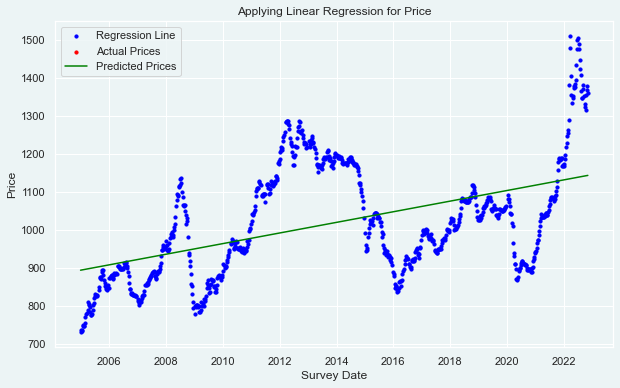

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(X_plot, Y, color='blue', s=10)
plt.scatter(X_plot[Y.isna()], Y_pred[Y.isna()], color='red', s=10)
plt.plot(X_plot, Y_pred, color='green')
plt.xlabel('Survey Date')
plt.ylabel('Price')
plt.title('Applying Linear Regression for Price')
plt.legend(['Regression Line', 'Actual Prices', 'Predicted Prices'])
plt.show()

In [ ]:
# Tính các sai số trong mô hình
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))

Mean squared error: 16959.81
Coefficient of determination: 0.24


**Giải thích:**

- **Mean squared error (MSE)** là độ đo sai số trung bình của mô hình. Giá trị MSE càng thấp thì mô hình càng chính xác. MSE tính bằng cách lấy tổng bình phương của sai số giữa giá trị thực tế và giá trị dự đoán, sau đó chia cho số lượng mẫu. MSE trong mô hình là 16959.81, khá cao, do đó mô hình kém chính xác.

- **Coefficient of determination (R-squared)** là một độ đo đánh giá mức độ giải thích của một mô hình hồi quy tuyến tính. Nó đo lường phần trăm của sự biến thiên của biến phụ thuộc mà mô hình có thể giải thích được bằng các biến độc lập. R2 có giá trị từ 0 đến 1, trong đó giá trị 1 thể hiện một mô hình hoàn hảo, mô hình giải thích được 100% sự biến thiên của biến phụ thuộc. R2 càng gần 1 thì mô hình càng tốt, còn nếu R2 gần 0 thì mô hình không tốt. R-square của mô hình là 0.24, điều này có nghĩa là mô hình chỉ giải thích được 24% sự biến thiên của giá tiền. Điều này cho thấy mô hình không phải là một mô hình tốt để dự đoán giá trị của biến phụ thuộc.

**Nhận xét chung:** Như vậy, đối với dữ liệu trong bài tập này, nếu áp dụng mô hình hồi quy tuyến tính thì sẽ cho ra kết quả khá thấp. Ta nên tìm kiếm và áp dụng các mô hình khác.

## Tài liệu tham khảo: 

https://www.kaggle.com/code/atrisaxena/animated-way-of-visualization-ipyvizzu

https://www.kaggle.com/code/bhuvanchennoju/data-science-salaries-plotly-tableau
